<a href="https://colab.research.google.com/github/RoadoneP/ML-DL/blob/main/PyTorch_tutorial/PyTorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [1]:
import torch

In [2]:
torch.__version__

'1.9.0+cu102'

### 초기화 되지 않은 행렬 

In [3]:
x = torch.empty(4, 2)
print(x)

tensor([[-6.5734e-31,  3.0771e-41],
        [ 3.3631e-44,  0.0000e+00],
        [        nan,  6.4460e-44],
        [ 1.1578e+27,  1.1362e+30]])


### 무작위로 초기화된 행렬

In [4]:
x = torch.rand(4, 2)
print(x)

tensor([[0.3271, 0.0584],
        [0.4929, 0.9937],
        [0.4419, 0.8003],
        [0.9901, 0.4991]])


### dtype이 long, 0으로 채워진 텐서

In [5]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [6]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [8]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [9]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-1.8887, -0.9486, -0.2858, -1.0543],
        [ 0.3672, -0.4094,  2.0395, -0.0234]])


### 텐서의 크기

In [10]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산(operations)

### 덧셈 1

In [11]:
print(x)

tensor([[-1.8887, -0.9486, -0.2858, -1.0543],
        [ 0.3672, -0.4094,  2.0395, -0.0234]])


In [13]:
y = torch.rand(2, 4)
print(y)
print(x+y)

tensor([[0.1252, 0.4489, 0.6973, 0.7575],
        [0.9936, 0.7442, 0.1147, 0.4179]])
tensor([[-1.7635, -0.4996,  0.4115, -0.2967],
        [ 1.3608,  0.3348,  2.1542,  0.3945]])


### 덧셈2

In [14]:
print(torch.add(x, y))

tensor([[-1.7635, -0.4996,  0.4115, -0.2967],
        [ 1.3608,  0.3348,  2.1542,  0.3945]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [16]:
result = torch.empty(2, 4)
torch.add(x, y, out=result)
print(result)

tensor([[-1.7635, -0.4996,  0.4115, -0.2967],
        [ 1.3608,  0.3348,  2.1542,  0.3945]])


### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [17]:
y.add_(x)
print(y)

tensor([[-1.7635, -0.4996,  0.4115, -0.2967],
        [ 1.3608,  0.3348,  2.1542,  0.3945]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [18]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(x-y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [20]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(x*y)
print(torch.mul(x, y))
print(x.mul(y))
print(y.mul(x))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [21]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(x / y)
print(torch.div(x, y))
print(x.div(y))
print(y.div(x))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[2.0000, 1.3333],
        [1.2000, 1.1429]])


In [23]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(torch.mm(x, y))

tensor([[20., 28.],
        [52., 76.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [24]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [25]:
print(x[:,1])

tensor([3., 7.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [29]:
x = torch.randn(4, 5)
y = x.view(20)
z = x.view(5, -1)

print(x.size())
print(y.size())
print(z.size())
print(x)
print(y)
print(z)

torch.Size([4, 5])
torch.Size([20])
torch.Size([5, 4])
tensor([[-1.1724,  1.0962, -0.3872, -0.5701,  2.0164],
        [-0.6296, -0.3382,  0.8139,  0.6816,  0.6446],
        [ 1.6238,  1.9668, -1.8974, -0.4808,  0.8600],
        [-0.5204,  0.6556,  1.6908,  0.7084, -2.7209]])
tensor([-1.1724,  1.0962, -0.3872, -0.5701,  2.0164, -0.6296, -0.3382,  0.8139,
         0.6816,  0.6446,  1.6238,  1.9668, -1.8974, -0.4808,  0.8600, -0.5204,
         0.6556,  1.6908,  0.7084, -2.7209])
tensor([[-1.1724,  1.0962, -0.3872, -0.5701],
        [ 2.0164, -0.6296, -0.3382,  0.8139],
        [ 0.6816,  0.6446,  1.6238,  1.9668],
        [-1.8974, -0.4808,  0.8600, -0.5204],
        [ 0.6556,  1.6908,  0.7084, -2.7209]])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [30]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-1.3661])
-1.3661483526229858
torch.float32


- 스칼라값 하나만 존재해야함

In [32]:
x = torch.randn(2)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.6867,  1.1660])


ValueError: ignored

### squeeze 
- 차원을 축소(제거)

In [41]:
tensor = torch.rand(1, 3, 3)
print(tensor)
tensor.shape

tensor([[[0.4525, 0.3113, 0.4861],
         [0.4363, 0.3780, 0.2819],
         [0.0760, 0.5263, 0.9534]]])


torch.Size([1, 3, 3])

In [40]:
t = tensor.squeeze()

print(t)
print(t.shape)

tensor([[0.3165, 0.1479, 0.8963],
        [0.4972, 0.2284, 0.5070],
        [0.0226, 0.5166, 0.6557]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [44]:
tensor = torch.rand(3, 3)
print(tensor)
tensor.shape

tensor([[0.5328, 0.6815, 0.9060],
        [0.1592, 0.0731, 0.9659],
        [0.9886, 0.0059, 0.2973]])


torch.Size([3, 3])

In [47]:
t = tensor.unsqueeze(dim=0)

print(t)
print(t.shape)

tensor([[[0.5328, 0.6815, 0.9060],
         [0.1592, 0.0731, 0.9659],
         [0.9886, 0.0059, 0.2973]]])
torch.Size([1, 3, 3])


### stack
- 텐서간 결합

In [48]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [53]:
a = torch.randn(1, 1, 3, 3)
b = torch.randn(1, 1, 3, 3)
c = torch.cat((a, b), dim=0)

print(c)
print(c.size())

tensor([[[[-2.8866,  0.5837, -0.7267],
          [-0.8367,  0.9428,  0.9684],
          [-0.9898,  0.2765, -1.1720]]],


        [[[ 0.4882, -0.2325, -0.4688],
          [ 0.3124, -0.8455,  0.3783],
          [ 0.4908, -0.2614, -0.8268]]]])
torch.Size([2, 1, 3, 3])


In [54]:
a = torch.randn(1, 3, 3)
b = torch.randn(1, 3, 3)
c = torch.cat((a, b), dim=2)

print(c)
print(c.size())

tensor([[[-0.6782, -2.5990, -1.3065, -1.4625, -0.4702, -0.7887],
         [ 0.1070, -0.0486, -1.4377,  0.0536,  0.5315, -1.7186],
         [-0.4021,  0.6860,  0.0059,  0.5452,  0.2685, -1.0325]]])
torch.Size([1, 3, 6])


### chuck
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [55]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.8946, 0.2106, 0.5384, 0.5408, 0.8313, 0.9105],
        [0.5799, 0.7547, 0.3099, 0.9814, 0.8019, 0.8450],
        [0.3061, 0.2518, 0.5356, 0.0681, 0.8485, 0.1328]])
tensor([[0.8946, 0.2106],
        [0.5799, 0.7547],
        [0.3061, 0.2518]])
tensor([[0.5384, 0.5408],
        [0.3099, 0.9814],
        [0.5356, 0.0681]])
tensor([[0.8313, 0.9105],
        [0.8019, 0.8450],
        [0.8485, 0.1328]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [56]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.5049, 0.7363, 0.7632, 0.4039, 0.9831, 0.0425],
        [0.3495, 0.7450, 0.1449, 0.9989, 0.9135, 0.3061],
        [0.3537, 0.9230, 0.9755, 0.9264, 0.4772, 0.5205]])
tensor([[0.5049, 0.7363, 0.7632],
        [0.3495, 0.7450, 0.1449],
        [0.3537, 0.9230, 0.9755]])
tensor([[0.4039, 0.9831, 0.0425],
        [0.9989, 0.9135, 0.3061],
        [0.9264, 0.4772, 0.5205]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [57]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [58]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [59]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [60]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [61]:
import torch

In [62]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.4418])
-0.44178423285484314
torch.float32


In [63]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu")

y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y
print(device)
print(z)
print(z.to("cpu", torch.double))

cuda
tensor([0.5582], device='cuda:0')
tensor([0.5582], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [64]:
import torch

In [65]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [66]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [67]:
print(y.grad_fn)

In [68]:
z = y * y * 2
out = z.mean()

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [71]:
a = torch.randn(3, 3)
a = ((a * 3) / (a - 1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [72]:
out.backward()

In [73]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [74]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
  y = y * 2

print(y)

tensor([-352.8008, 1365.6416, -259.8132], grad_fn=<MulBackward0>)


In [75]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [76]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
  print((x ** 2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [77]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all()) # x와 y가 같다.

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [78]:
import torch

In [79]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [80]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [81]:
print("a.data:",a.data)
print("a.grad:",a.grad)
print("a.grad_fn",a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: None
a.grad_fn None


- $b = a + 2$

In [82]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$ 

In [83]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [84]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [85]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [86]:
print("a.data:",a.data)
print("a.grad:",a.grad)
print("a.grad_fn",a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn None


In [89]:
print("b.data:",b.data)
print("b.grad:",b.grad)
print("b.grad_fn",b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.grad_fn <AddBackward0 object at 0x7fc1b732fb90>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  


In [92]:
print("c.data:",c.data)
print("c.grad:",c.grad)
print("c.grad_fn",c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad_fn <PowBackward0 object at 0x7fc1b74e4b10>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  


In [91]:
print("out.data:",out.data)
print("out.grad:",out.grad)
print("out.grad_fn",out.grad_fn)

out.data: tensor(36.)
out.grad: None
out.grad_fn <SumBackward0 object at 0x7fc1b73a8e50>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [104]:
x = torch.ones(3, requires_grad=True)
y = (x ** 2)
z = y ** 2 - x
out = z.sum()
print(out)

tensor(0., grad_fn=<SumBackward0>)


In [105]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [106]:
print("x.data:",x.data)
print("x.grad:",x.grad)
print("x.grad_fn",x.grad_fn)

x.data: tensor([1., 1., 1.])
x.grad: tensor([  0.3000,   3.0000, 300.0000])
x.grad_fn None


In [107]:
print("y.data:",y.data)
print("y.grad:",y.grad)
print("y.grad_fn",y.grad_fn)

y.data: tensor([1., 1., 1.])
y.grad: None
y.grad_fn <PowBackward0 object at 0x7fc1b732d810>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  


In [108]:
print("z.data:",z.data)
print("z.grad:",z.grad)
print("z.grad_fn",z.grad_fn)

z.data: tensor([0., 0., 0.])
z.grad: None
z.grad_fn <SubBackward0 object at 0x7fc1b72c8fd0>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능
 


### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [109]:
import torch
import torch.nn as nn

- Convolution Layer 예시 (1)


In [111]:
m = nn.Conv2d(16, 33, 3, stride=2)

m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))

m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))

input = torch.randn(20, 16, 50, 100)
output = m(input)

In [112]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [113]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [114]:
filters = torch.randn(8, 4, 3, 3)

In [116]:
inputs = torch.randn(1, 4, 5, 5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [117]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [118]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,), std=(0.5,))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [119]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [121]:
trainset = torchvision.datasets.MNIST(root='/content/',
                                      train=True,
                                      download=True,
                                      transform=transform)
testset = torchvision.datasets.MNIST(root='/content/',
                                      train=False,
                                      download=True,
                                      transform=transform)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [122]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [124]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape
# 8개의 배치사이즈로 1, 28, 28 Mnist 가져옴

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [133]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [134]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [131]:
image = torch_image.numpy()
image.shape

(28, 28)

In [135]:
label = labels[0].numpy()
label.shape

()

In [136]:
label

array(9)

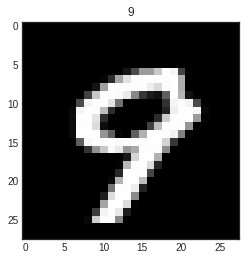

In [137]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

## 각 Layer 설명

In [138]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [139]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [140]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [141]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [142]:
weight = weight.detach()

In [143]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

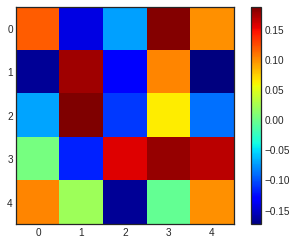

In [144]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [145]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [148]:
input_image = torch.unsqueeze(images[0], dim=0)
input_image.shape

torch.Size([1, 1, 28, 28])

In [147]:
output_data = layer(input_image)

In [149]:
output = output_data.data

In [151]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

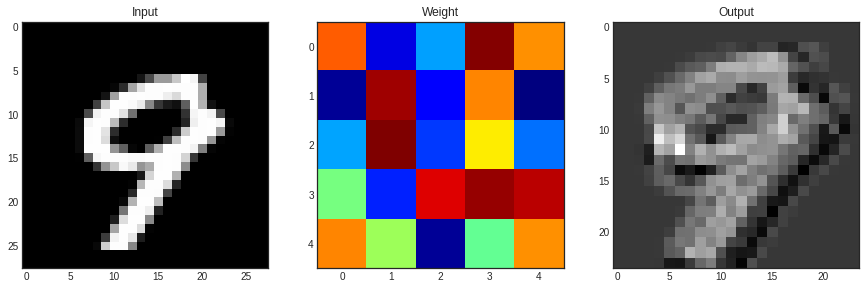

In [155]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [156]:
image.shape

(28, 28)

In [157]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [159]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

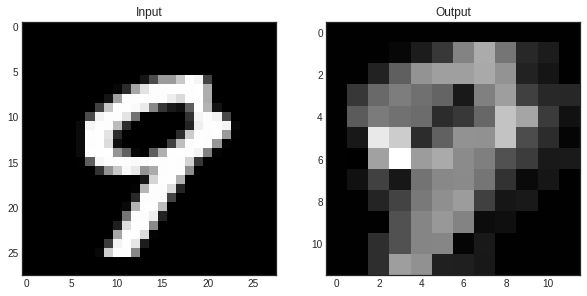

In [160]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [161]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [162]:
flatten = image.view(1, -1)
flatten.shape

torch.Size([1, 784])

In [163]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [164]:
lin

tensor([[ 0.4380, -0.4146,  0.2995,  0.1655, -0.1035, -0.2130,  0.4925,  0.8333,
         -0.5128,  0.6765]], grad_fn=<AddmmBackward>)

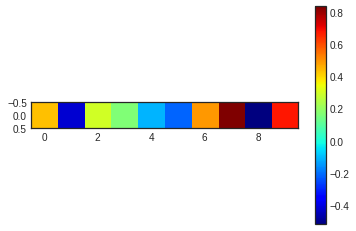

In [165]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [166]:
with torch.no_grad():
  flatten = image.view(1,-1)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

In [167]:
softmax

tensor([[0.1291, 0.0597, 0.0392, 0.0707, 0.1554, 0.2288, 0.0879, 0.0922, 0.0619,
         0.0752]])

In [168]:
np.sum(softmax.numpy())

1.0

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [169]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [170]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

